In [4]:
# !pip install vivarium-core

In [1]:
# !pip install matplotlib

In [2]:
# Imports and Notebook Utilities
import os
import copy
import pylab as plt
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
import matplotlib

# Process, Deriver, and Composer base classes
from vivarium.core.process import Process, Deriver
from vivarium.core.composer import Composer
from vivarium.core.registry import process_registry

# other vivarium imports
from vivarium.core.engine import Engine, pp
from vivarium.library.units import units

# plotting functions
from vivarium.plots.simulation_output import (
    plot_simulation_output, plot_variables)
from vivarium.plots.simulation_output import _save_fig_to_dir as save_fig_to_dir
from vivarium.plots.agents_multigen import plot_agents_multigen
from vivarium.plots.topology import plot_topology

# supress warnings in notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:
# !pip show vivarium-core

In [4]:
# !which python

In [5]:
from vivarium.core.process import Process
from vivarium.core.engine import Engine

class PredatorPrey(Process):
    defaults = {
        'alpha': 0.1,  # Prey growth rate
        'beta': 0.02,  # Predation rate
        'gamma': 0.1,  # Predator death rate
        'delta': 0.01  # Predator reproduction rate due to predation
    }

    def __init__(self, parameters=None):
        super().__init__(parameters)

    def ports_schema(self):
        return {
            'prey': {
                'x': {
                    '_default': 40.0,
                    '_emit': True,
                    '_updater': 'accumulate'
                }
            },
            'predator': {
                'y': {
                    '_default': 9.0,
                    '_emit': True,
                    '_updater': 'accumulate'
                }
            }
        }

    def next_update(self, timestep, states):
        x = states['prey']['x']
        y = states['predator']['y']

        dx = (self.parameters['alpha'] * x - self.parameters['beta'] * x * y) * timestep
        dy = (self.parameters['delta'] * x * y - self.parameters['gamma'] * y) * timestep

        return {
            'prey': {'x': dx},
            'predator': {'y': dy}
        }

# Instantiate and test
predator_prey_process = PredatorPrey()

print("Predator-Prey process successfully created!")


Predator-Prey process successfully created!



Simulation ID: 0557b426-75cb-11ef-8428-2514467c434f
Created: 09/18/2024 at 10:33:50
Completed in 0.003928 seconds


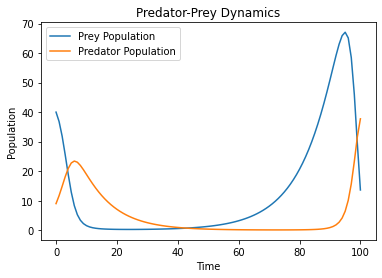

In [6]:
from vivarium.core.process import Process
from vivarium.core.engine import Engine
import numpy as np
import matplotlib.pyplot as plt

class PredatorPrey(Process):
    defaults = {
        'alpha': 0.1,  # Prey growth rate
        'beta': 0.02,  # Predation rate
        'gamma': 0.1,  # Predator death rate
        'delta': 0.01  # Predator reproduction rate due to predation
    }

    def __init__(self, parameters=None):
        super().__init__(parameters)

    def ports_schema(self):
        return {
            'prey': {
                'x': {
                    '_default': 40.0,
                    '_emit': True,
                    '_updater': 'accumulate'
                }
            },
            'predator': {
                'y': {
                    '_default': 9.0,
                    '_emit': True,
                    '_updater': 'accumulate'
                }
            }
        }

    def next_update(self, timestep, states):
        x = states['prey']['x']  # Prey population
        y = states['predator']['y']  # Predator population

        # Calculate changes using Lotka-Volterra equations
        dx = (self.parameters['alpha'] * x - self.parameters['beta'] * x * y) * timestep
        dy = (self.parameters['delta'] * x * y - self.parameters['gamma'] * y) * timestep

        # Return updates to the population
        return {
            'prey': {'x': dx},
            'predator': {'y': dy}
        }

# Create predator-prey process
predator_prey_process = PredatorPrey()

# Define the initial state
initial_state = {
    'prey': {'x': 40.0},
    'predator': {'y': 9.0}
}

# Create simulation engine
experiment = Engine(
    composite=predator_prey_process.generate(),
    initial_state=initial_state
)

# Run simulation for 100 time steps
experiment.update(100)

# Retrieve simulation results
timeseries = experiment.emitter.get_timeseries()

# Extract data for plotting
times = timeseries['time']
prey_population = timeseries['prey']['x']
predator_population = timeseries['predator']['y']

# Plot prey and predator populations over time
plt.plot(times, prey_population, label='Prey Population')
plt.plot(times, predator_population, label='Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Dynamics')
plt.legend()


# Save plot
plt.savefig('predator_prey_plot_mix.png', format='png', dpi=600)
# print("Plot saved as predator_prey_plot_mix.png")


plt.show()



Plot saved as predator_prey_Topology.png


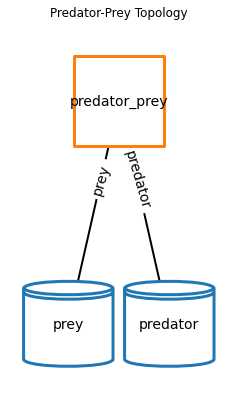

In [7]:
import matplotlib
from vivarium.plots.topology import plot_topology
import matplotlib.pyplot as plt

# Define color scheme for prey and predator
store_cmap = matplotlib.cm.get_cmap('Dark2')
prey_color = matplotlib.colors.to_rgba(store_cmap(0))
predator_color = matplotlib.colors.to_rgba(store_cmap(1))

# Define composite with processes, topology, and steps
composite = {
    'processes': {
        'predator_prey': predator_prey_process
    },
    'topology': {
        'predator_prey': {
            'prey': ('prey',),
            'predator': ('predator',)
        }
    },
    'steps': {}  # Empty steps, we need it for plot_topology to work
}

# Generate basic topology plot 
plot_topology(composite)


# Save plot 
plt.savefig('predator_prey_Topology.png', format='png', dpi=600)
print("Plot saved as predator_prey_Topology.png")

# Display the plot
plt.title('Predator-Prey Topology')
plt.show()




Simulation ID: PredatorPrey
Created: 09/18/2024 at 10:33:54
Completed in 0.003927 seconds
Writing out/predator_prey_output.pdf
Plot saved as predator_prey_plot.png


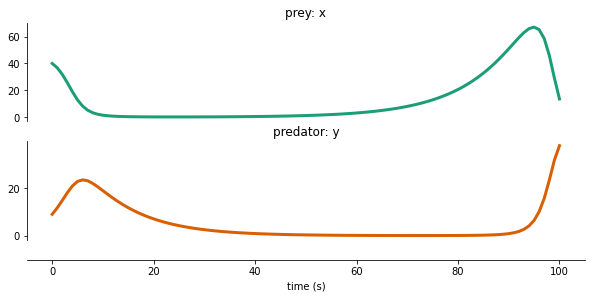

In [8]:
import matplotlib
import matplotlib.pyplot as plt
from vivarium.core.engine import Engine
from vivarium.core.process import Process
from vivarium.library.units import units

# Define predator-prey process similar to the Tx process
class PredatorPrey(Process):
    defaults = {
        'alpha': 0.1,  # Prey growth rate
        'beta': 0.02,  # Predation rate
        'gamma': 0.1,  # Predator death rate
        'delta': 0.01  # Predator reproduction rate due to predation
    }

    def __init__(self, parameters=None):
        super().__init__(parameters)

    # Define the ports and the states for prey and predator
    def ports_schema(self):
        return {
            'prey': {
                'x': {
                    '_default': 40.0,
                    '_emit': True,
                    '_updater': 'accumulate'
                }
            },
            'predator': {
                'y': {
                    '_default': 9.0,
                    '_emit': True,
                    '_updater': 'accumulate'
                }
            }
        }

    # Define update logic based on predator-prey equations
    def next_update(self, timestep, states):
        x = states['prey']['x']  # Current prey population
        y = states['predator']['y']  # Current predator population

        # Calculate changes using Lotka-Volterra equations
        dx = (self.parameters['alpha'] * x - self.parameters['beta'] * x * y) * timestep
        dy = (self.parameters['delta'] * x * y - self.parameters['gamma'] * y) * timestep

        # Return updates to population
        return {
            'prey': {'x': dx},
            'predator': {'y': dy}
        }

# Helper functions for composition
def process_in_experiment(process, settings, initial_state):
    composite = process.generate()
    return Engine(
        composite=composite,
        initial_state=initial_state,
        **settings)

# Color scheme
store_cmap = matplotlib.cm.get_cmap('Dark2')
prey_color = matplotlib.colors.to_rgba(store_cmap(0))
predator_color = matplotlib.colors.to_rgba(store_cmap(1))

store_colors = {
    'prey': prey_color,
    'predator': predator_color
}

# Plotting configurations
plot_var_config = {
    'row_height': 2,
    'row_padding': 0.2,
    'column_width': 10,
    'out_dir': 'out'
}

# Corrected plotting configurations for prey and predator
predator_prey_plot_config = {
    'variables': [
        {
            'variable': ('prey', 'x'),  # Correct path for prey population
            'color': store_colors['prey']
        },
        {
            'variable': ('predator', 'y'),  # Correct path for predator population
            'color': store_colors['predator']
        }
    ],
    'filename': 'predator_prey_output.pdf',
    **plot_var_config
}

# Simulation settings
predator_prey_config = {'time_step': 1}
predator_prey_sim_settings = {'experiment_id': 'PredatorPrey'}
predator_prey_initial_state = {
    'prey': {'x': 40.0},
    'predator': {'y': 9.0}
}

# Initialize the predator-prey process
predator_prey_process = PredatorPrey(predator_prey_config)

# Create the experiment
predator_prey_exp = process_in_experiment(
    predator_prey_process,
    predator_prey_sim_settings,
    predator_prey_initial_state
)

# Run simulation
predator_prey_exp.update(100)

# Retrieve the data as a timeseries
predator_prey_output = predator_prey_exp.emitter.get_timeseries()

# Plot results
fig = plot_variables(predator_prey_output, **predator_prey_plot_config)



# Save plot
plt.savefig('predator_prey_plot.png', format='png', dpi=600)
print("Plot saved as predator_prey_plot.png")


plt.show()


Phase curve saved as predator_prey_phase_curve.png


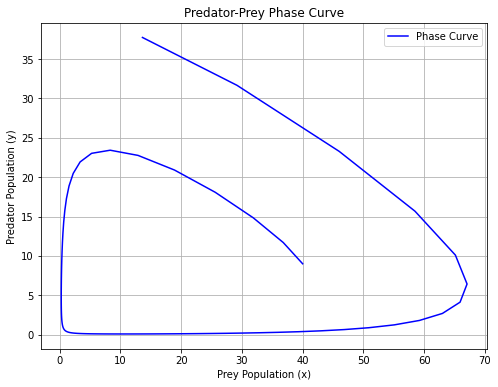

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming predator_prey_output is the timeseries data from the simulation
prey_population = predator_prey_output['prey']['x']  # Prey population over time
predator_population = predator_prey_output['predator']['y']  # Predator population over time

# Create the phase plot
plt.figure(figsize=(8, 6))

# Plot prey vs predator (phase curve)
plt.plot(prey_population, predator_population, label="Phase Curve", color="blue")

# Add labels and title
plt.xlabel("Prey Population (x)")
plt.ylabel("Predator Population (y)")
plt.title("Predator-Prey Phase Curve")

# Optional: Add grid and legend
plt.grid(True)
plt.legend()

# Save the phase curve plot as a PNG file
plt.savefig('predator_prey_phase_curve.png', format='png', dpi=300)
print("Phase curve saved as predator_prey_phase_curve.png")

# Show the plot
plt.show()
